<a href="https://colab.research.google.com/github/nirob271/learning-ml-dl-fl/blob/main/Breast_cancer_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import(
    accuracy_score,
    confusion_matrix,
    classification_report,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score,
    roc_curve,
    auc
)

# **Dataset**

In [2]:
from google.colab import drive
drive.mount('/content/drive')
import warnings
warnings.filterwarnings('ignore')


Mounted at /content/drive


In [3]:
 data = pd.read_csv('/content/drive/MyDrive/Dataset/Breast_Cancer_Wisconsin_Dataset.csv')

# **Prepare Data**

In [4]:
print("Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)")

# Convert diagnosis to numbers
data['diagnosis_numeric'] = data['diagnosis'].map({'M': 1, 'B': 0})

# Define X and y
X = data.drop(columns=['id', 'diagnosis', 'diagnosis_numeric'])
y = data['diagnosis_numeric']

# Random Forest for feature importance
rf = RandomForestClassifier(n_estimators=200, random_state=42)
rf.fit(X, y)

# Feature importance
importances = pd.Series(rf.feature_importances_, index=X.columns)
top_features = importances.sort_values(ascending=False).head(10)

# Selected features
X_selected = X[top_features.index]

print("Selected Features:")
print(top_features)


Converting M → 1 (Malignant Cancer) and B → 0 (Benign Cancer)
Selected Features:
perimeter_worst         0.135239
concave points_worst    0.132450
radius_worst            0.121587
concave points_mean     0.102258
area_worst              0.096785
area_mean               0.067576
concavity_mean          0.049032
radius_mean             0.039506
perimeter_mean          0.037927
area_se                 0.030233
dtype: float64


# **Train and Test Split**

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=20
)

print(f"Training: {len(X_train)} patients (computer will learn from these)")
print(f"Testing:  {len(X_test)} patients (computer will be tested on these)")

# Show some training examples
print(f"\n Training Examples (Computer learns from these):")
print(X_train.head())

Training: 455 patients (computer will learn from these)
Testing:  114 patients (computer will be tested on these)

 Training Examples (Computer learns from these):
     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
412        9.397         21.68           59.75      268.8          0.07969   
461       27.420         26.27          186.90     2501.0          0.10840   
532       13.680         16.33           87.76      575.5          0.09277   
495       14.870         20.21           96.12      680.9          0.09587   
13        15.850         23.95          103.70      782.7          0.08401   

     compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
412           0.06053         0.03735             0.005128         0.1274   
461           0.19880         0.36350             0.168900         0.2061   
532           0.07255         0.01752             0.018800         0.1631   
495           0.08345         0.06824             0.049510 

In [6]:
doctor = DecisionTreeClassifier(
    max_depth=5,
    random_state=20
)
print("Teaching doctor with training data...")
doctor.fit(X_train, y_train)
print("Doctor training completed!")


Teaching doctor with training data...
Doctor training completed!


In [7]:
print("Now let's see how good our doctor is...")

predictions = doctor.predict(X_test)

print("Doctor made predictions for all test patients!")

# Calculate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"\nDoctor Accuracy: {accuracy:.3f} ({accuracy*100:.1f}%)")

if accuracy > 0.95:
    print("EXCELLENT! Our doctor is very accurate!")
elif accuracy > 0.90:
    print("GOOD! Our doctor performs well!")
elif accuracy > 0.80:
    print("OK! Our doctor is decent!")
else:
    print("Needs improvement...")

Now let's see how good our doctor is...
Doctor made predictions for all test patients!

Doctor Accuracy: 0.956 (95.6%)
EXCELLENT! Our doctor is very accurate!


# Confusion Matrix

Confusion Matrix:
[[65  1]
 [ 4 44]]

Correct: 109
Wrong: 5


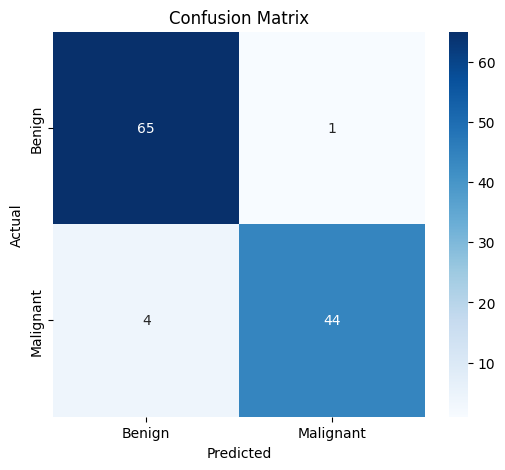

In [8]:
cm = confusion_matrix(y_test, predictions)


print("Confusion Matrix:")
print(cm)
print(f"\nCorrect: {cm[0,0] + cm[1,1]}")
print(f"Wrong: {cm[0,1] + cm[1,0]}")


plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benign', 'Malignant'],
            yticklabels=['Benign', 'Malignant'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# **Detailed Performance**

Accuracy:  0.96
Precision: 0.98
Recall:    0.92
F1-Score:  0.95


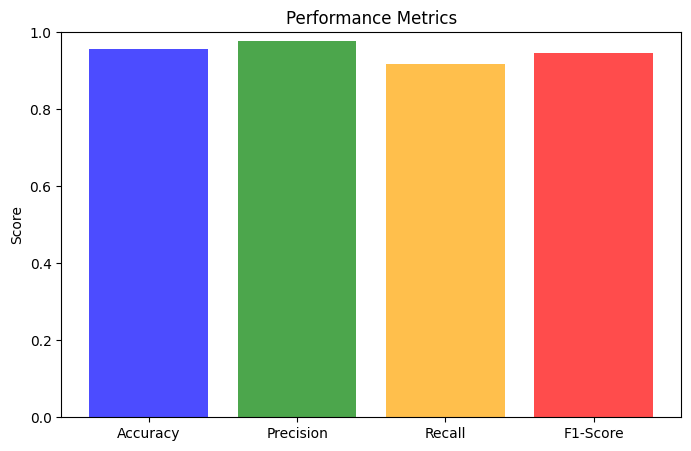

In [9]:
accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)

print(f"Accuracy:  {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall:    {recall:.2f}")
print(f"F1-Score:  {f1:.2f}")

plt.figure(figsize=(8, 5))
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
values = [accuracy, precision, recall, f1]
plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'], alpha=0.7)
plt.ylim(0, 1)
plt.title('Performance Metrics')
plt.ylabel('Score')
plt.show()